In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.8MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [11]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**First Find SRH v CSK**

**There was one more team from Hydrebad Earlier i.e Deccan Chargers, but here the conext is different than like Delhi Capitals and RCB from BRC**

**Let's move with just SRH only**

**Let's go on now -**
**KKR V RCB -  Q1**

In [12]:
data_f = data2.loc[data2.team1.isin(['Sunrisers Hyderabad', 'Chennai Super Kings'])] 
data_f = data_f.loc[data_f.team2.isin(['Sunrisers Hyderabad', 'Chennai Super Kings'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
413,414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Aleem Dar,S Das,NaN
434,435,2013,Hyderabad,2013-05-08,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal",S Das,NJ Llong,NaN
473,474,2014,Sharjah,2014-04-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium,AK Chaudhary,VA Kulkarni,NaN
506,507,2014,Ranchi,2014-05-22,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,DA Warner,JSCA International Stadium Complex,BNJ Oxenford,C Shamshuddin,NaN
520,521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
550,551,2015,Hyderabad,2015-05-02,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Sunrisers Hyderabad,22,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,K Srinivasan,NaN
655,7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",Anil Chaudhary,Vineet Kulkarni,Nigel Llong
681,7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium,Marais Erasmus,Yeshwant Barde,Anil Dandekar
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


Finally , We have got a complete dataset for all the matches of  CSK Vs SRH 

**Let's do Q1 now**

CSK Wins - 9
SRH Wins - 3


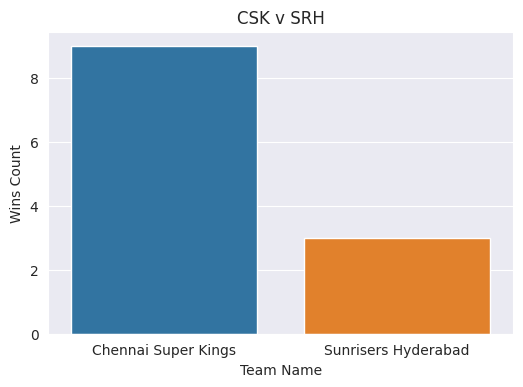

In [13]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('CSK v SRH')
A,B =data_f.winner.value_counts()

print('CSK Wins -',A)
print('SRH Wins -',B)

plt.show()


Let's go for CSK Tomorrow

**Let's do Q2 now**

In [14]:
data_w = data.loc[data.batting_team.isin(['Sunrisers Hyderabad', 'Chennai Super Kings'])]
data_w = data_w.loc[data.bowling_team.isin(['Sunrisers Hyderabad', 'Chennai Super Kings'])]
data_w

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
97960,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,1,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
97961,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,2,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,3,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,Q de Kock,caught,M Vijay
97963,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,4,GH Vihari,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
97964,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,5,GH Vihari,S Dhawan,MM Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174689,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,1,AT Rayudu,KM Jadhav,S Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174690,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,2,KM Jadhav,AT Rayudu,S Sharma,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
174691,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,3,KM Jadhav,AT Rayudu,S Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174692,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,4,AT Rayudu,KM Jadhav,S Sharma,0,0,0,0,0,0,0,0,0,AT Rayudu,caught,V Shankar


In [15]:
data_w.wide_runs.sum() # Total wide runs in CSK v SRH

87

In [16]:
np.round(87/12,2) # Average Wide Runs per Match

7.25

For Q2 let's mark 6-8 there.

**For Q3, Let's analyze David Warner's record v CSK overall and as SRH Player both**

In [18]:
data_d = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_d = data_d.loc[data.batsman.isin(['DA Warner'])]
data_d


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
32857,141,2,Delhi Daredevils,Chennai Super Kings,2,3,DA Warner,G Gambhir,S Tyagi,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
32859,141,2,Delhi Daredevils,Chennai Super Kings,2,5,DA Warner,G Gambhir,S Tyagi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
32860,141,2,Delhi Daredevils,Chennai Super Kings,2,6,DA Warner,G Gambhir,S Tyagi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
32861,141,2,Delhi Daredevils,Chennai Super Kings,2,7,DA Warner,G Gambhir,S Tyagi,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
32864,141,2,Delhi Daredevils,Chennai Super Kings,3,3,DA Warner,G Gambhir,JA Morkel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174527,11332,1,Sunrisers Hyderabad,Chennai Super Kings,13,3,DA Warner,MK Pandey,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174529,11332,1,Sunrisers Hyderabad,Chennai Super Kings,13,5,DA Warner,MK Pandey,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174531,11332,1,Sunrisers Hyderabad,Chennai Super Kings,14,1,DA Warner,MK Pandey,Harbhajan Singh,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
174532,11332,1,Sunrisers Hyderabad,Chennai Super Kings,14,2,DA Warner,MK Pandey,Harbhajan Singh,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [19]:
data_d.batsman_runs.sum() # Total of Warner's runs v CSK

448

In [20]:
data_d.match_id.nunique() # Warner matches v CSK

14

In [21]:
data_d.player_dismissed.value_counts() # Finding how many times he has been dismissed to find the average

DA Warner    14
Name: player_dismissed, dtype: int64

In [22]:
np.round(448/14,2) # Average of Warner v CSK

32.0

That's a good performance by Warner v CSK.

Let's find his performance as a SRH Player v CSK

In [24]:
data_l = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_l = data_l.loc[data.batting_team.isin(['Sunrisers Hyderabad'])]
data_l = data_l.loc[data.batsman.isin(['DA Warner'])]
data_l

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
112196,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,3,DA Warner,AJ Finch,BW Hilfenhaus,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
112197,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,4,DA Warner,AJ Finch,BW Hilfenhaus,0,0,0,0,0,0,0,0,0,DA Warner,lbw,NaN
120256,507,2,Sunrisers Hyderabad,Chennai Super Kings,1,1,DA Warner,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
120257,507,2,Sunrisers Hyderabad,Chennai Super Kings,1,2,DA Warner,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
120258,507,2,Sunrisers Hyderabad,Chennai Super Kings,1,3,DA Warner,S Dhawan,MM Sharma,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174527,11332,1,Sunrisers Hyderabad,Chennai Super Kings,13,3,DA Warner,MK Pandey,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174529,11332,1,Sunrisers Hyderabad,Chennai Super Kings,13,5,DA Warner,MK Pandey,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174531,11332,1,Sunrisers Hyderabad,Chennai Super Kings,14,1,DA Warner,MK Pandey,Harbhajan Singh,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
174532,11332,1,Sunrisers Hyderabad,Chennai Super Kings,14,2,DA Warner,MK Pandey,Harbhajan Singh,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [28]:
data_l.batsman_runs.sum() # Total of Warner's runs v CSK as a SRH Player

314

In [29]:
data_l.match_id.nunique() # Warner matches v CSK as a SRH Player

6

In [30]:
data_l.player_dismissed.value_counts() # Finding how many times he has been dismissed to find the average

DA Warner    6
Name: player_dismissed, dtype: int64

In [31]:
np.round(314/6,2) # Average of Warner v CSK as a SRH Player

52.33

That's a phenomenal performance by Warner against CSK

Let's mark 40+ there now without any doubt

**Let's move on to Q4 now**

Let's find average wickets lost by CSK v SRH


In [32]:
data_n = data.loc[data.batting_team.isin(['Chennai Super Kings'])]
data_n = data_n.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98083,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,1,MEK Hussey,M Vijay,DJG Sammy,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
98084,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,2,MEK Hussey,M Vijay,DJG Sammy,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
98085,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,3,M Vijay,MEK Hussey,DJG Sammy,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
98086,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,4,M Vijay,MEK Hussey,DJG Sammy,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
98087,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,5,MEK Hussey,M Vijay,DJG Sammy,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174689,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,1,AT Rayudu,KM Jadhav,S Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174690,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,2,KM Jadhav,AT Rayudu,S Sharma,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
174691,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,3,KM Jadhav,AT Rayudu,S Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174692,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,4,AT Rayudu,KM Jadhav,S Sharma,0,0,0,0,0,0,0,0,0,AT Rayudu,caught,V Shankar


In [33]:
data_n.match_id.nunique() # verifying matches should be 12

12

In [36]:
data_n.player_dismissed.value_counts()

SK Raina           10
F du Plessis        7
SR Watson           5
DR Smith            4
MS Dhoni            4
RA Jadeja           4
AT Rayudu           3
MEK Hussey          2
M Vijay             2
BB McCullum         2
DJ Bravo            2
KM Jadhav           1
DL Chahar           1
P Negi              1
Harbhajan Singh     1
SW Billings         1
Name: player_dismissed, dtype: int64

In [37]:
data_n.player_dismissed.value_counts().sum() # Total wickets v SRH

50

In [40]:
np.round(50/12,2) # Average Wicket's loss of CSK v SRH

4.17

So, On an average in CSK v SRH , CSK losses 4.17 wickets per inning

Let's mark 3-5 option considering our analysis.

**Let's move to Q5 now**

**Let's find total average runs**


In [41]:
data_w.total_runs.sum()  # data_w is our desired dataset from above for this problem

4136

In [42]:
np.round(4136/12,2) # Average Score in CSK v SRH Contest

344.67

Let's mark 341 - 360 considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

